# TASK
## Deadline: 7 aprilie ora 23:59.

Formular pentru trimiterea temei: https://forms.gle/dKdEDhiHkCKQgQbN6

1. Descarcati un text mai mare in engleza (ex. un articol de pe wikipedia, vedeti cum mai jos).
2. Incarcati modelul Word2Vec de la Google, la fel ca in laborator.
3. Afisati cate cuvinte (tokens) distincte din text sunt acoperite de model (modelul contine vectori pentru acele cuvinte), si cate cuvinte distincte din text nu sunt acoperite de model.
4. Determinati pentru toate perechile de cuvinte distincte din text care este similaritatea lor. Afisati top 3 cele mai similare perechi, si top 3 cele mai nesimilare.
5. In urmatoarele cerinte vom compara modelul Google cu cel antrenat in cadrul laboratorului pe corpusul `text8`. Pentru fiecare cuvand din lista urmatoare determinati lista celor mai similare cuvinte conform modelului Google si lista celor mai similare cuvinte conform modelului text8: `smart, king, big`. Observati diferente?
6. Plotati intr-un grafic embeddingurile reduse la 2 dimensiuni (folosind PCA) din modelul Google pentru cuvintele `car, motorcycle, bike, man, person, woman, child, king, queen, prince, plant, tree, flower`, separat construiti acelasi grafic si pentru modelul antrenat folosind text8. Ce asemanari/diferente observati?

In [1]:
! pip install wikipedia


You should consider upgrading via the '/home/alhiris/.pyenv/versions/3.9.9/bin/python3.9 -m pip install --upgrade pip' command.


In [2]:
# 1
import wikipedia
page_title = "twitter"
wikipedia.set_lang("en")  # vrem articole in Engleza
page = wikipedia.page(page_title, auto_suggest=False)

print(page.content[:200])
print(len(page.content))


Twitter is an American microblogging and social networking service on which users post and interact with messages known as "tweets". Registered users can post, like, and retweet tweets, but unregister
127794


In [3]:
# 2
import gensim.downloader as api
google_model = api.load("word2vec-google-news-300")


/home/alhiris/.pyenv/versions/3.9.9/lib/python3.9/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [16]:
# 3
vocabulary = google_model.index_to_key
data = page.content.split(' ')

common_data = [word for word in data if word in vocabulary]

print(f'Length of the vocabulary: {len(vocabulary)}')
print(vocabulary[:20])
print(f'Length of the words in text: {len(data)}')
print(data[:20])
print(f'Number of words that are in the vocabulary: {len(common_data)}')
print(f'Number of words that arent in the vocabulary: {len(data) - len(common_data)}')


Length of the vocabulary: 3000000
['</s>', 'in', 'for', 'that', 'is', 'on', '##', 'The', 'with', 'said', 'was', 'the', 'at', 'not', 'as', 'it', 'be', 'from', 'by', 'are']
Length of the words in text: 19898
['Twitter', 'is', 'an', 'American', 'microblogging', 'and', 'social', 'networking', 'service', 'on', 'which', 'users', 'post', 'and', 'interact', 'with', 'messages', 'known', 'as', '"tweets".']
Number of words that are in the vocabulary: 14518
Number of words that arent in the vocabulary: 5380


In [22]:
# 4
from copy import deepcopy
from tqdm import tqdm

def insert_sorted(in_list, element, max_length, order="desc"):
    new_list = deepcopy(in_list)
    for index in range(len(new_list)):
        if order == "desc":
            if new_list[index][2] < element[2]:
                new_list.insert(index, element)
        elif order == "asc":
            if new_list[index][2] > element[2]:
                new_list.insert(index, element)
    if len(new_list) == 0:
        new_list.append(element)
    return new_list[:min(max_length, len(new_list))]

common_data_unique = list(set(common_data))

# top = []
# bottom = []
# for i in tqdm(range(len(common_data_unique))):
#     for j in range(i + 1, len(common_data_unique)):
#         similarity = google_model.similarity(common_data_unique[i], common_data_unique[j])
#         element = (common_data_unique[i], common_data_unique[j], similarity)
#         top = insert_sorted(top, element, max_length=3)
#         bottom = insert_sorted(bottom, element, max_length=3, order="asc")
#         print(top)
#         print(bottom)
#
# print("Top three elements in similarity:")
# print(top)
# print("Bottom three elements in similarity:")
# print(bottom)

all_pairs = []
for i in tqdm(range(len(common_data_unique))):
    for j in range(i + 1, len(common_data_unique)):
        similarity = google_model.similarity(common_data_unique[i], common_data_unique[j])
        element = (common_data_unique[i], common_data_unique[j], similarity)
        all_pairs.append(element)


100%|██████████| 3620/3620 [01:29<00:00, 40.42it/s] 


In [24]:
sorted_pairs = sorted(all_pairs, key=lambda x: x[2], reverse=True)
print("Top three elements in similarity:")
print(sorted_pairs[:3])
print("Bottom three elements in similarity:")
print(sorted_pairs[-3:])

Top three elements in similarity:
[('four', 'three', 0.9703434), ('January', 'February', 0.96759385), ('February', 'October', 0.96359354)]
Bottom three elements in similarity:
[('8.', 'however', -0.24982508), ('another', 'Founded', -0.2534207), ('foreword', 'or', -0.25518972)]


In [ ]:
# 5
# skip

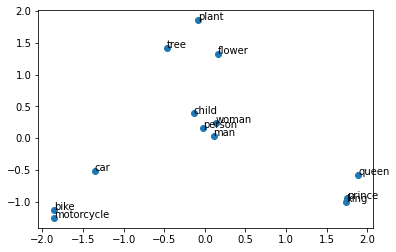

In [25]:
# 6
# only for Google model
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
words = ['car', 'motorcycle', 'bike', 'man', 'person', 'woman', 'child', 'king', 'queen', 'prince', 'plant', 'tree', 'flower']
vectors = [google_model[word] for word in words]

pca = PCA(n_components=2)
pca.fit(vectors)
vectors_2d = pca.transform(vectors)

x = [v[0] for v in vectors_2d]
y = [v[1] for v in vectors_2d]
fig, ax = plt.subplots()
ax.scatter(x, y)

for i, txt in enumerate(words):
    ax.annotate(txt, (x[i], y[i]))

plt.show()
